In [46]:
import mtcnn
import numpy as np
import pandas as pd
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from keras_facenet import FaceNet
from PIL import Image
import os

In [47]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [48]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)

trainX, trainy = load_dataset('./lfw/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('./tests/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('dataset.npz', trainX, trainy, testX, testy)

loaded 1 sample for class: Perry_Compton
loaded 1 sample for class: Derrick_Rodgers
loaded 1 sample for class: Larry_Donald
loaded 1 sample for class: Milt_Palacio
loaded 1 sample for class: Mario_Vasquez_Rana
loaded 1 sample for class: Richard_Perle
loaded 4 sample for class: Samuel_Waksal
loaded 2 sample for class: Rolandas_Paksas
loaded 7 sample for class: Matthew_Perry
loaded 1 sample for class: Derek_Parra
loaded 2 sample for class: Lana_Clarkson
loaded 1 sample for class: Robert_Morvillo
loaded 5 sample for class: Nick_Nolte
loaded 1 sample for class: Rob_Moore
loaded 1 sample for class: Brian_Billick
loaded 2 sample for class: Stan_Heath
loaded 1 sample for class: Craig_Burley
loaded 1 sample for class: Sonja_Kesselschlager
loaded 1 sample for class: Yasushi_Chimura
loaded 2 sample for class: Maggie_Smith
loaded 1 sample for class: Erwin_Mapasseng
loaded 1 sample for class: Charla_Moye
loaded 1 sample for class: Stephen_Funk
loaded 1 sample for class: Pauline_Landers
loaded 1 sa

loaded 4 sample for class: Alec_Baldwin
loaded 1 sample for class: Zhong_Nanshan
loaded 1 sample for class: John_Rowe
loaded 1 sample for class: Yoshiyuki_Kamei
loaded 1 sample for class: Hilmi_Akin_Zorlu
loaded 1 sample for class: Viola_Davis
loaded 1 sample for class: Dianne_Reeves
loaded 1 sample for class: Sherry_Fisher
loaded 1 sample for class: Roger_Suarez
loaded 1 sample for class: Tino_Martinez
loaded 1 sample for class: Christian_Gimenez
loaded 1 sample for class: Eduardo_Romero
loaded 4 sample for class: Eliane_Karp
loaded 1 sample for class: Yang_Pao-yu
loaded 1 sample for class: Ali_Adbul_Karim_Madani
loaded 1 sample for class: Nina_Pecari
loaded 2 sample for class: Jefferson_Perez
loaded 1 sample for class: Alfonso_Cuaron
loaded 1 sample for class: Jose_Canseco_Sr
loaded 1 sample for class: Cha_Yung-gu
loaded 3 sample for class: Ali_Khamenei
loaded 1 sample for class: Bobby_Bowden
loaded 2 sample for class: Gerry_Parsky
loaded 1 sample for class: Octavio_Lara
loaded 1 sam

loaded 1 sample for class: Martin_Short
loaded 1 sample for class: Ronald_Kadish
loaded 1 sample for class: Narayan_Singh_Pun
loaded 2 sample for class: Jesse_James_Leija
loaded 2 sample for class: Lea_Fastow
loaded 6 sample for class: Jay_Garner
loaded 2 sample for class: Augusto_Roa_Bastos
loaded 1 sample for class: Jim_Parque
loaded 1 sample for class: Jerry_Sloan
loaded 3 sample for class: Lynn_Redgrave
loaded 1 sample for class: Mark_Komara
loaded 1 sample for class: Matt_Siebrandt
loaded 1 sample for class: Yekaterina_Guseva
loaded 2 sample for class: Ricardo_Monasterio
loaded 1 sample for class: Jorge_Alberto_Galindo
loaded 1 sample for class: Tocker_Pudwill
loaded 1 sample for class: Paul_Murphy
loaded 1 sample for class: Jose_Lopez_Beltran
loaded 1 sample for class: Robert_Nardelli
loaded 1 sample for class: Markus_Beyer
loaded 1 sample for class: Ronald_Harwood
loaded 1 sample for class: Jason_Sorens
loaded 7 sample for class: Mike_Myers
loaded 1 sample for class: Queen_Sofia

loaded 1 sample for class: Mary_Blige
loaded 2 sample for class: Chung_Mong-hun
loaded 1 sample for class: Noer_Muis
loaded 1 sample for class: Bob_Crippen
loaded 2 sample for class: Dennis_Erickson
loaded 1 sample for class: Casey_Crowder
loaded 1 sample for class: Armand_Sargen
loaded 1 sample for class: Namuddu_Florence
loaded 1 sample for class: Drew_Bledsoe
loaded 4 sample for class: Alexander_Downer
loaded 1 sample for class: Austin_Kearns
loaded 1 sample for class: Mehmet_Ali_Sahin
loaded 1 sample for class: Scott_Dickson
loaded 2 sample for class: Jennifer_Rodriguez
loaded 4 sample for class: Erin_Runnion
loaded 1 sample for class: Michele_Placido
loaded 1 sample for class: William_Hurt
loaded 2 sample for class: Steve_Park
loaded 1 sample for class: Julio_Toro
loaded 1 sample for class: Aparna_Pillai
loaded 1 sample for class: Alfonso_Soriano
loaded 1 sample for class: Prince_Rainier_III
loaded 1 sample for class: Lionel_Hampton
loaded 1 sample for class: Shaun_Rusling
loaded 

loaded 6 sample for class: Robert_De_Niro
loaded 1 sample for class: Vanessa_Laine
loaded 1 sample for class: Yoo_Jay-Kun
loaded 1 sample for class: Jana_Henke
loaded 1 sample for class: Neil_Goldman
loaded 1 sample for class: Zydrunas_Ilgauskas
loaded 2 sample for class: Mikulas_Dzurinda
loaded 1 sample for class: Richard_Fine
loaded 1 sample for class: Cole_Chapman
loaded 6 sample for class: Kamal_Kharrazi
loaded 1 sample for class: Rodrigo_de_la_Cerna
loaded 1 sample for class: Judy_Dean
loaded 2 sample for class: Robby_Ginepri
loaded 1 sample for class: Robert_Weitzel
loaded 3 sample for class: Bridgette_Wilson-Sampras
loaded 2 sample for class: Henrique_Meirelles
loaded 1 sample for class: AJ_Cook
loaded 1 sample for class: Sarah_Weddington
loaded 1 sample for class: Craig_Wilson
loaded 1 sample for class: David_Donohue
loaded 1 sample for class: Shane_Hmiel
loaded 1 sample for class: Walt_Harris
loaded 1 sample for class: Richard_Jewell
loaded 1 sample for class: Andy_Rooney
load

loaded 1 sample for class: Thomas_Kelly
loaded 1 sample for class: Jack_Osbourne
loaded 1 sample for class: Peter_Max
loaded 1 sample for class: Chang_Sang
loaded 1 sample for class: Jerry_Oliver
loaded 5 sample for class: Xanana_Gusmao
loaded 18 sample for class: Michael_Schumacher
loaded 1 sample for class: Nawabzada_Nasrullah_Khan
loaded 1 sample for class: Kyle_Shewfelt
loaded 1 sample for class: Jung_Bong
loaded 1 sample for class: Bob_Newhart
loaded 1 sample for class: Angel_Maza
loaded 1 sample for class: Rainer_Gut
loaded 1 sample for class: Crandall_Bowles
loaded 1 sample for class: David_Provost
loaded 1 sample for class: Joshua_Perper
loaded 2 sample for class: Barry_Alvarez
loaded 1 sample for class: Gustavo_Franco
loaded 1 sample for class: Vinnie_Jones
loaded 1 sample for class: Atiabet_Ijan_Amabel
loaded 5 sample for class: Queen_Rania
loaded 1 sample for class: Joe_Darrell
loaded 2 sample for class: Bijan_Namdar_Zangeneh
loaded 3 sample for class: Carlos_Ruiz
loaded 1 s

loaded 1 sample for class: Darin_Erstad
loaded 2 sample for class: Jong_Thae_Hwa
loaded 1 sample for class: Douglas_Meester
loaded 1 sample for class: Boris_Trajkovski
loaded 1 sample for class: Dean_Barker
loaded 1 sample for class: Cosmo_Iacavazzi
loaded 1 sample for class: David_Hanson
loaded 1 sample for class: Ken_Dorsey
loaded 1 sample for class: Tayshaun_Prince
loaded 2 sample for class: John_Cusack
loaded 1 sample for class: Skip_Prosser
loaded 1 sample for class: John_Baldacci
loaded 1 sample for class: Eduardo_Chillida
loaded 1 sample for class: Nicoletta_Braschi
loaded 10 sample for class: Jacques_Rogge
loaded 1 sample for class: Abdullah_Ahmad_Badawi
loaded 1 sample for class: Andy_Benes
loaded 5 sample for class: Eduard_Shevardnadze
loaded 1 sample for class: Ira_Einhorn
loaded 1 sample for class: Carroll_Weimer
loaded 1 sample for class: Marina_Kuptsova
loaded 1 sample for class: Patrick_Coleman
loaded 2 sample for class: Joseph_Blatter
loaded 4 sample for class: Amer_al-

loaded 1 sample for class: Claude_Jorda
loaded 2 sample for class: Bernardo_Segura
loaded 1 sample for class: Tian_Zhuang_Zhuang
loaded 1 sample for class: Mohammed_Abulhasan
loaded 1 sample for class: Mike_Duke
loaded 1 sample for class: Jose_Jose
loaded 1 sample for class: Jeanette_Gray
loaded 1 sample for class: Mariam_Ali_Hassan
loaded 5 sample for class: Cruz_Bustamante
loaded 1 sample for class: Saman_Shali
loaded 1 sample for class: Ryan_Drese
loaded 2 sample for class: Nancy_Demme
loaded 1 sample for class: Desmon_Farmer
loaded 2 sample for class: Robert_Ehrlich
loaded 1 sample for class: Hugo_Conte
loaded 1 sample for class: Derian_Hatcher
loaded 1 sample for class: Corinna_Harfouch
loaded 1 sample for class: Steve_Avery
loaded 1 sample for class: Andrei_Konchalovsky
loaded 4 sample for class: Rita_Wilson
loaded 1 sample for class: Rudy_Tomjanovich
loaded 3 sample for class: Conchita_Martinez
loaded 2 sample for class: Kirk_Ferentz
loaded 1 sample for class: Severino_Antinori


loaded 1 sample for class: Penelope_Taylor
loaded 1 sample for class: Tommy_Maddox
loaded 1 sample for class: Billy_Donovan
loaded 1 sample for class: Jamie_Dimon
loaded 1 sample for class: Rien_Long
loaded 1 sample for class: Charles_Lebois
loaded 1 sample for class: Kong_Quan
loaded 2 sample for class: Carol_Moseley_Braun
loaded 1 sample for class: Ray_Liotta
loaded 1 sample for class: Miranda_Gaddis
loaded 3 sample for class: Hee-Won_Han
loaded 1 sample for class: Ray_Morrough
loaded 1 sample for class: Serge_Klarsfeld
loaded 1 sample for class: Bernard_Kerik
loaded 2 sample for class: Lindsey_Graham
loaded 1 sample for class: Sergei_Yushenkov
loaded 1 sample for class: Yingfan_Wang
loaded 1 sample for class: Martha_Martinez_Flores
loaded 1 sample for class: Nur_Jaafar
loaded 1 sample for class: Stacey_Jones
loaded 1 sample for class: Mike_Tice
loaded 4 sample for class: Guillermo_Canas
loaded 1 sample for class: Tomas_Malik
loaded 1 sample for class: Donny_Osmond
loaded 1 sample fo

loaded 3 sample for class: William_Bratton
loaded 2 sample for class: Abdullatif_Sener
loaded 3 sample for class: Jorge_Batlle
loaded 1 sample for class: Conrad_Black
loaded 8 sample for class: Li_Zhaoxing
loaded 1 sample for class: Nila_Ferran
loaded 1 sample for class: Geoff_Dixon
loaded 10 sample for class: Javier_Solana
loaded 1 sample for class: Mitchell_Swartz
loaded 4 sample for class: Mian_Khursheed_Mehmood_Kasuri
loaded 1 sample for class: Melina_Kanakaredes
loaded 1 sample for class: Sandra_Day_OConner
loaded 1 sample for class: Pablo_Khulental
loaded 1 sample for class: Scott_Wittman
loaded 1 sample for class: Se_Hyuk_Joo
loaded 11 sample for class: Mike_Weir
loaded 1 sample for class: Pedro_Pauleta
loaded 2 sample for class: Ralph_Lauren
loaded 1 sample for class: Eric_Fehr
loaded 1 sample for class: Ringo_Starr
loaded 1 sample for class: Todd_Petit
loaded 1 sample for class: Daniel_Montgomery
loaded 1 sample for class: Erin_Brockovich
loaded 2 sample for class: Mike_Babcoc

loaded 49 sample for class: Vladimir_Putin
loaded 1 sample for class: John_Gordnick
loaded 1 sample for class: Betty_Garrison
loaded 1 sample for class: Lee_Ann_Womack
loaded 1 sample for class: Bartosz_Kizierowski
loaded 3 sample for class: Adel_Al-Jubeir
loaded 1 sample for class: Terrence_Kiel
loaded 1 sample for class: Satnarine_Sharma
loaded 1 sample for class: Paddy_Long
loaded 1 sample for class: Takeo_Fukui
loaded 1 sample for class: Ruben_Wolkowyski
loaded 1 sample for class: Mitsou_Gelinas
loaded 1 sample for class: Leon_Lai
loaded 1 sample for class: Kenneth_Brill
loaded 1 sample for class: Kathie_Louise_Saunders
loaded 1 sample for class: Paul_Krueger
loaded 1 sample for class: Mike_Sherman
loaded 1 sample for class: Princess_Maxima
loaded 1 sample for class: Willie_Wilson
loaded 1 sample for class: Richard_Cohen
loaded 1 sample for class: William_Perry
loaded 2 sample for class: Arye_Mekel
loaded 1 sample for class: Catherine_Ndereba
loaded 2 sample for class: Aron_Ralston

loaded 1 sample for class: Gordana_Grubin
loaded 8 sample for class: Justin_Timberlake
loaded 1 sample for class: Paul_Schrader
loaded 1 sample for class: Quincy_Jones
loaded 1 sample for class: Ben_Wallace
loaded 11 sample for class: Nicanor_Duarte_Frutos
loaded 144 sample for class: Tony_Blair
loaded 1 sample for class: Rhett_Warrener
loaded 1 sample for class: Michelle_Chiklis
loaded 1 sample for class: Miguel_Angel_Rodriguez
loaded 1 sample for class: Morgan_Hentzen
loaded 2 sample for class: Jane_Kaczmarek
loaded 1 sample for class: Erika_Reyes
loaded 1 sample for class: Jerry_Jones
loaded 1 sample for class: Gerard_Tronche
loaded 1 sample for class: Jawad_Boulus
loaded 1 sample for class: Gael_Garcia_Bermal
loaded 1 sample for class: Peter_Fisher
loaded 1 sample for class: Gary_Bettman
loaded 1 sample for class: John_Anderson
loaded 8 sample for class: Mohamed_ElBaradei
loaded 1 sample for class: Javier_Camara
loaded 1 sample for class: Phillip_Fulmer
loaded 1 sample for class: M

loaded 1 sample for class: William_Ragland
loaded 3 sample for class: Milo_Maestrecampo
loaded 2 sample for class: George_Tenet
loaded 15 sample for class: Julie_Gerberding
loaded 1 sample for class: Carol_Niedermayer
loaded 1 sample for class: Raja_Ramani
loaded 1 sample for class: Ion_Tiriac
loaded 1 sample for class: Phillipe_Comtois
loaded 1 sample for class: John_Belushi
loaded 3 sample for class: Heinz_Feldmann
loaded 1 sample for class: Anastasia_Kelesidou
loaded 4 sample for class: Omar_Sharif
loaded 1 sample for class: Darryl_McDaniels
loaded 1 sample for class: Anthony_Corso
loaded 1 sample for class: Hank_McKinnell
loaded 1 sample for class: Edward_Johnson
loaded 1 sample for class: Thomas_Scavone
loaded 2 sample for class: Peter_Hillary
loaded 1 sample for class: Kelly_Santos
loaded 1 sample for class: William_Murabito
loaded 1 sample for class: Gordon_Cooper
loaded 1 sample for class: Otto_Schily
loaded 1 sample for class: Wolfgang_Clement
loaded 2 sample for class: Alimzh

loaded 1 sample for class: Kenny_Brack
loaded 2 sample for class: Ellen_DeGeneres
loaded 4 sample for class: Lee_Hoi-chang
loaded 2 sample for class: Shia_LaBeouf
loaded 1 sample for class: Kim_Hong-gul
loaded 1 sample for class: Dule_Hill
loaded 1 sample for class: Robert_Pollack
loaded 2 sample for class: Erika_Christensen
loaded 1 sample for class: Leonardo_Del_Vecchio
loaded 1 sample for class: Peter_Mackay
loaded 1 sample for class: John_Nash
loaded 2 sample for class: Alan_Ball
loaded 1 sample for class: David_McKiernan
loaded 1 sample for class: Clive_Woodward
loaded 1 sample for class: Ruth_Stubbs
loaded 1 sample for class: Tony_Clement
loaded 1 sample for class: Jane_Rooney
loaded 1 sample for class: Mark_Lazarus
loaded 1 sample for class: Paul_Gannon
loaded 1 sample for class: Danny_Avalon
loaded 1 sample for class: AJ_Lamas
loaded 1 sample for class: Meg_Mallon
loaded 1 sample for class: Guangdong_Ou_Guangyuan
loaded 1 sample for class: Nicolas_Macrozonaris
loaded 1 sample f

loaded 1 sample for class: Stephanie_Cohen_Aloro
loaded 1 sample for class: Claudio_Lopez
loaded 1 sample for class: Elizabeth_Regan
loaded 1 sample for class: Tamika_Catchings
loaded 5 sample for class: Carrie-Anne_Moss
loaded 2 sample for class: Ernie_Fletcher
loaded 1 sample for class: Lesia_Burlak
loaded 1 sample for class: Nathan_Powell
loaded 1 sample for class: Kristin_Chenoweth
loaded 3 sample for class: Orlando_Bloom
loaded 2 sample for class: Owen_Wilson
loaded 3 sample for class: Paul_Wellstone
loaded 2 sample for class: Mark_Heller
loaded 1 sample for class: Lisa_Stone
loaded 1 sample for class: Armando_Carrillo
loaded 1 sample for class: Stephen_Keener
loaded 1 sample for class: Beyonce_Knowles
loaded 1 sample for class: Jodie_Henry
loaded 2 sample for class: Richard_Crenna
loaded 1 sample for class: Brandon_Lloyd
loaded 1 sample for class: Patrik_Kristiansson
loaded 1 sample for class: Bill_Stapleton
loaded 1 sample for class: Kenneth_Reichert
loaded 2 sample for class: L

loaded 1 sample for class: Ernie_Harwell
loaded 1 sample for class: Rocco_Buttiglione
loaded 1 sample for class: Alanna_Ubach
loaded 1 sample for class: Gerald_Calabrese
loaded 1 sample for class: Bill_Byrne
loaded 1 sample for class: Hubie_Brown
loaded 1 sample for class: Szu_Yu_Chen
loaded 1 sample for class: Morris_Watts
loaded 3 sample for class: Paul_Sarbanes
loaded 2 sample for class: Carlos_Mesa
loaded 2 sample for class: Muammar_Gaddafi
loaded 1 sample for class: Andres_Pastrana
loaded 2 sample for class: Francis_Ford_Coppola
loaded 1 sample for class: Tom_Foy
loaded 1 sample for class: Andrew_Sabey
loaded 1 sample for class: Scott_Gorelick
loaded 4 sample for class: Roy_Williams
loaded 1 sample for class: Rina_Lazo
loaded 1 sample for class: Hassanal_Bolkiah
loaded 1 sample for class: Rowan_Williams
loaded 1 sample for class: Marquis_Estill
loaded 1 sample for class: Gustavo_Noboa
loaded 1 sample for class: Ivana_Trump
loaded 1 sample for class: John_Lithgow
loaded 2 sample fo

loaded 1 sample for class: Jim_Jeffords
loaded 1 sample for class: Daryl_Smith
loaded 1 sample for class: Sun_Myung_Moon
loaded 1 sample for class: Nathalie_Gagnon
loaded 1 sample for class: Benicio_Del_Toro
loaded 1 sample for class: Nadia_Forte
loaded 1 sample for class: Svetlana_Belousova
loaded 4 sample for class: Mikhail_Kasyanov
loaded 1 sample for class: Charlie_Coles
loaded 1 sample for class: Jim_Talent
loaded 3 sample for class: Petria_Thomas
loaded 1 sample for class: Michael_Killeen
loaded 1 sample for class: Laurie_Hobbs
loaded 4 sample for class: Prince_Claus
loaded 3 sample for class: Kenneth_Bowersox
loaded 1 sample for class: Greg_Hodge
loaded 1 sample for class: Zahir_Shah
loaded 1 sample for class: Renato_Soru
loaded 1 sample for class: Nathirah_Hussein
loaded 1 sample for class: Mike_Johanns
loaded 1 sample for class: Joe_Glover
loaded 1 sample for class: Gary_Gero
loaded 1 sample for class: Mary_Catherine_Correll
loaded 2 sample for class: Lisa_Raymond
loaded 1 sam

loaded 1 sample for class: Franco_Cangele
loaded 1 sample for class: Timothy_McVeigh
loaded 1 sample for class: Bobby_Kielty
loaded 1 sample for class: Micky_Ward
loaded 1 sample for class: Anthony_Garotinho
loaded 1 sample for class: Adam_Ant
loaded 1 sample for class: Saoud_Al_Faisal
loaded 2 sample for class: Paul_Patton
loaded 4 sample for class: Nelson_Mandela
loaded 1 sample for class: Qazi_Afzal
loaded 1 sample for class: Michael_Jasny
loaded 60 sample for class: Junichiro_Koizumi
loaded 1 sample for class: Reggie_Lewis
loaded 1 sample for class: Koichiro_Matsuura
loaded 8 sample for class: Yao_Ming
loaded 1 sample for class: Paula_Abdul
loaded 1 sample for class: Christy_Ferer
loaded 1 sample for class: Evelyn_Lauder
loaded 1 sample for class: Henry_Kissinger
loaded 1 sample for class: Richard_Chamberlain
loaded 2 sample for class: Vince_Gill
loaded 1 sample for class: Larry_Hagman
loaded 1 sample for class: Daniel_Coats
loaded 1 sample for class: Robert_McKee
loaded 2 sample f

loaded 11 sample for class: Tang_Jiaxuan
loaded 2 sample for class: Miroljub
loaded 4 sample for class: Raoul_Ruiz
loaded 1 sample for class: Donald_Keck
loaded 1 sample for class: Richard_Daley
loaded 18 sample for class: Richard_Myers
loaded 1 sample for class: Anna_Jones
loaded 1 sample for class: Jimmy_Iovine
loaded 2 sample for class: Cesar_Maia
loaded 2 sample for class: Michel_Therrien
loaded 1 sample for class: Al_Cardenas
loaded 1 sample for class: Patrick_Kron
loaded 1 sample for class: Herb_Ritts
loaded 3 sample for class: Horst_Koehler
loaded 2 sample for class: Stephen_Ambrose
loaded 2 sample for class: Joe_Calzaghe
loaded 3 sample for class: Ashton_Kutcher
loaded 1 sample for class: Ray_Sherman
loaded 1 sample for class: Hector_Mitelman
loaded 1 sample for class: Tom_Rouen
loaded 1 sample for class: Turner_Stevenson
loaded 1 sample for class: Wendell_Bryant
loaded 1 sample for class: Gong_Ruina
loaded 3 sample for class: Diana_Munz
loaded 1 sample for class: Thomas_Fergus

loaded 1 sample for class: Tim_Lobinger
loaded 2 sample for class: Ricky_Ponting
loaded 1 sample for class: Christian_Patino
loaded 8 sample for class: Ron_Dittemore
loaded 1 sample for class: Stephen_Swindal
loaded 1 sample for class: Jose_Luis_Rodriguez_Zapatero
loaded 1 sample for class: Hal_McCoy
loaded 13 sample for class: Salma_Hayek
loaded 1 sample for class: Tim_Blake_Nelson
loaded 1 sample for class: Ryan_Leaf
loaded 2 sample for class: Jorge_Rodolfo_Canicoba_Corral
loaded 1 sample for class: Azmi_Bishara
loaded 3 sample for class: Sarah_Michelle_Gellar
loaded 2 sample for class: Jorge_Arce
loaded 19 sample for class: Carlos_Moya
loaded 1 sample for class: Steve_Nesbitt
loaded 1 sample for class: Leandrinho_Barbosa
loaded 1 sample for class: Colleen_OClair
loaded 1 sample for class: Elena_Tihomirova
loaded 1 sample for class: Jack_Smith
loaded 3 sample for class: Antonio_Trillanes
loaded 1 sample for class: Jeffrey_Pfeffer
loaded 1 sample for class: Patsy_Kensit
loaded 1 sampl

loaded 2 sample for class: Russell_Coutts
loaded 1 sample for class: Vyacheslav_Fetisov
loaded 1 sample for class: Damon_Stoudamire
loaded 1 sample for class: Mitchell_Potter
loaded 2 sample for class: Orrin_Hatch
loaded 1 sample for class: Robin_Williams
loaded 7 sample for class: Mike_Martz
loaded 1 sample for class: Jim_Letten
loaded 1 sample for class: Gary_Marshall
loaded 1 sample for class: Maria_Bello
loaded 5 sample for class: Arnoldo_Aleman
loaded 109 sample for class: Gerhard_Schroeder
loaded 3 sample for class: Mariangel_Ruiz_Torrealba
loaded 1 sample for class: Michael_Shane_Jolly
loaded 1 sample for class: Dariusz_Michalczewski
loaded 1 sample for class: Robert_Flodquist
loaded 1 sample for class: Ronald_White
loaded 1 sample for class: Wolfgang_Schneiderhan
loaded 1 sample for class: Tatiana_Paus
loaded 53 sample for class: John_Ashcroft
loaded 1 sample for class: Uzi_Landau
loaded 1 sample for class: Timbul_Silaen
loaded 1 sample for class: JC_Chasez
loaded 1 sample for 

loaded 1 sample for class: Rick_Caruso
loaded 1 sample for class: Michael_Chertoff
loaded 6 sample for class: Ricardo_Sanchez
loaded 1 sample for class: Kwon_Young-gil
loaded 1 sample for class: Judith_Nathan
loaded 4 sample for class: Jim_Hahn
loaded 3 sample for class: Rick_Barnes
loaded 1 sample for class: Leticia_Dolera
loaded 1 sample for class: Edward_Belvin
loaded 1 sample for class: Mario_Gallegos
loaded 1 sample for class: Chistian_Stahl
loaded 1 sample for class: Elodie_Bouchez
loaded 1 sample for class: Charlie_Williams
loaded 1 sample for class: Adisai_Bodharamik
loaded 1 sample for class: Jerry_Lewis
loaded 1 sample for class: Andre_Techine
loaded 1 sample for class: Samantha_Ledster
loaded 1 sample for class: Michael_Kors
loaded 1 sample for class: Jessica_Brungo
loaded 1 sample for class: Lydia_Shum
loaded 1 sample for class: Pierre_Png
loaded 1 sample for class: Valentina_Tereshkova
loaded 1 sample for class: David_Surrett
loaded 1 sample for class: James_Hallock
loaded

loaded 1 sample for class: Robert_Lee_Yates_Jr
loaded 3 sample for class: Sam_Torrance
loaded 1 sample for class: Charlie_Hunnam
loaded 1 sample for class: Andrea_Yates
loaded 1 sample for class: Peter_Gilmour
loaded 1 sample for class: Jeane_Kirkpatrick
loaded 1 sample for class: Tirunesh_Dibaba
loaded 1 sample for class: Richard_Regenhard
loaded 1 sample for class: Clint_Howard
loaded 4 sample for class: Conan_OBrien
loaded 1 sample for class: Mike_Sweeney
loaded 1 sample for class: John_McKay
loaded 2 sample for class: Miguel_Contreras
loaded 1 sample for class: Bob_Hartley
loaded 1 sample for class: Kaio_Almeida
loaded 1 sample for class: Zorica_Radovic
loaded 7 sample for class: Jean-Pierre_Raffarin
loaded 4 sample for class: Tony_Shalhoub
loaded 1 sample for class: Chuck_Hagel
loaded 1 sample for class: Brajesh_Mishra
loaded 2 sample for class: Frank_Griswold
loaded 17 sample for class: Jean_Charest
loaded 1 sample for class: Joseph_Hoy
loaded 5 sample for class: James_Wolfensohn

loaded 1 sample for class: Monique_Ferreira
loaded 1 sample for class: Ian_Smith
loaded 4 sample for class: Augustin_Calleri
loaded 1 sample for class: Brandon_Larson
loaded 2 sample for class: George_Karl
loaded 3 sample for class: Placido_Domingo
loaded 1 sample for class: Mike_Stefanik
loaded 1 sample for class: Edward_Flynn
loaded 1 sample for class: Corliss_Williamson
loaded 1 sample for class: Rod_Paige
loaded 1 sample for class: Ernie_Stewart
loaded 1 sample for class: Barry_Bonds
loaded 1 sample for class: Abraham_Foxman
loaded 1 sample for class: Mike_Webster
loaded 3 sample for class: Ian_McKellen
loaded 1 sample for class: Baburam_Bhattari
loaded 2 sample for class: Ken_Watanabe
loaded 1 sample for class: Andrzej_Tyszkiewicz
loaded 2 sample for class: Dennis_Powell
loaded 1 sample for class: Daniel_Montenegro
loaded 1 sample for class: Choi_Yun-yong
loaded 1 sample for class: Sara_Elisabeth_Ahmad
loaded 1 sample for class: Tiago_Splitter
loaded 1 sample for class: Serena_Kar

loaded 1 sample for class: Darrell_Dickey
loaded 1 sample for class: Brittany_Snow
loaded 1 sample for class: Carlos_Savedra
loaded 1 sample for class: Ibrahim_Rugova
loaded 2 sample for class: Corinne_Coman
loaded 1 sample for class: Daniela_Cicarelli
loaded 2 sample for class: Gillian_Anderson
loaded 1 sample for class: Anthony_Ervin
loaded 1 sample for class: Natanaela_Barnova
loaded 1 sample for class: Tayyeb_Abdel_Rahim
loaded 55 sample for class: Jean_Chretien
loaded 1 sample for class: Najib_al-Salhi
loaded 1 sample for class: Joe_Cocker
loaded 41 sample for class: Lleyton_Hewitt
loaded 2 sample for class: Alberto_Ruiz_Gallardon
loaded 2 sample for class: Patrick_Leahy
loaded 1 sample for class: Terry_Hoeppner
loaded 19 sample for class: Nicole_Kidman
loaded 2 sample for class: Phil_Mickelson
loaded 1 sample for class: Jesus_Cardenal
loaded 1 sample for class: Kim_Chinn
loaded 1 sample for class: Chip_Knight
loaded 2 sample for class: Tracy_McGrady
loaded 1 sample for class: Don

loaded 1 sample for class: Fatmir_Limaj
loaded 3 sample for class: Tom_Reilly
loaded 1 sample for class: Rick_Reed
loaded 6 sample for class: Tommy_Haas
loaded 5 sample for class: Catherine_Deneuve
loaded 1 sample for class: Shigeo_Nagashima
loaded 1 sample for class: Jennifer_McCoy
loaded 3 sample for class: Isabella_Rossellini
loaded 4 sample for class: Tim_Allen
loaded 1 sample for class: Idi_Amin
loaded 1 sample for class: Lee_Baca
loaded 3 sample for class: Arnold_Palmer
loaded 2 sample for class: James_Smith
loaded 3 sample for class: Peter_Arnett
loaded 1 sample for class: Mario_Lemieux
loaded 1 sample for class: Anthony_Hazen
loaded 1 sample for class: Richard_Parsons
loaded 1 sample for class: Saeed_Mortazavi
loaded 1 sample for class: Ghassan_Elashi
loaded 1 sample for class: Danis_Tanovic
loaded 1 sample for class: Michael_Clarke_Duncan
loaded 3 sample for class: Luciano_Pavarotti
loaded 8 sample for class: Kevin_Costner
loaded 1 sample for class: Sinead_OConnor
loaded 1 sam

loaded 1 sample for class: Aileen_Riggin_Soule
loaded 1 sample for class: Sammy_Knight
loaded 3 sample for class: Jose_Sarney
loaded 4 sample for class: Rafael_Ramirez
loaded 1 sample for class: Jennifer_Gratz
loaded 1 sample for class: Mike_Bryan
loaded 1 sample for class: Joshua_Davey
loaded 1 sample for class: Kirk_Douglas
loaded 5 sample for class: Robert_Kocharian
loaded 2 sample for class: Vaclav_Klaus
loaded 1 sample for class: Colin_Campbell
loaded 1 sample for class: Kajsa_Bergqvist
loaded 1 sample for class: Marsha_Thomason
loaded 1 sample for class: Alberto_Sordi
loaded 2 sample for class: Ricky_Barnes
loaded 3 sample for class: Emma_Thompson
loaded 2 sample for class: Eva_Dimas
loaded 1 sample for class: Soon_Yi
loaded 9 sample for class: Sylvester_Stallone
loaded 1 sample for class: Brian_Gregory
loaded 1 sample for class: Betty_Williams
loaded 1 sample for class: Andres_DAlessandro
loaded 1 sample for class: Vassilis_Xiros
loaded 1 sample for class: Paul_Ebert
loaded 4 sa

loaded 1 sample for class: Jalal_Talabani
loaded 1 sample for class: Diana_Taylor
loaded 1 sample for class: Kenenisa_Bekele
loaded 1 sample for class: SJ_Twu
loaded 4 sample for class: Matt_Damon
loaded 1 sample for class: Du_Qinglin
loaded 1 sample for class: Hasan_Wirayuda
loaded 1 sample for class: Junko_Tabei
loaded 1 sample for class: Steve_Cox
loaded 2 sample for class: William_Rehnquist
loaded 1 sample for class: Tomas_Enge
loaded 1 sample for class: Hushiar_Zebari
loaded 1 sample for class: Kathryn_Morris
loaded 8 sample for class: Kim_Dae-jung
loaded 1 sample for class: Stella_McCartney
loaded 1 sample for class: Bonnie_Hunt
loaded 1 sample for class: Steve_Alford
loaded 1 sample for class: Bob_Hayes
loaded 1 sample for class: Nuon_Chea
loaded 1 sample for class: Nicola_Wells
loaded 1 sample for class: Michael_Hoffa
loaded 1 sample for class: Etta_James
loaded 2 sample for class: Larry_Johnson
loaded 1 sample for class: Donald_Keyser
loaded 1 sample for class: Craig_MacTavish

loaded 1 sample for class: Carol_Carmody
loaded 1 sample for class: Matt_Welsh
loaded 1 sample for class: Adoor_Gopalakarishnan
loaded 6 sample for class: Leonid_Kuchma
loaded 1 sample for class: Jean_Nagel
loaded 1 sample for class: Diego_Colorado
loaded 1 sample for class: Reyyan_Uzuner
loaded 1 sample for class: John_Wayne
loaded 2 sample for class: Edward_Said
loaded 1 sample for class: Charles_Holzner
loaded 1 sample for class: Tali_Imani
loaded 2 sample for class: Ricardo_Maduro
loaded 2 sample for class: Nancy_Sinatra
loaded 10 sample for class: Richard_Gere
loaded 1 sample for class: Gabrielle_Rose
loaded 1 sample for class: Chloe_Sevigny
loaded 12 sample for class: Harrison_Ford
loaded 10 sample for class: Paradorn_Srichaphan
loaded 1 sample for class: Brian_Kerr
loaded 1 sample for class: Dan_Reeves
loaded 1 sample for class: JT_Snow
loaded 1 sample for class: Ryan_Goodman
loaded 4 sample for class: Ronaldo_Luis_Nazario_de_Lima
loaded 1 sample for class: Brady_Rodgers
loaded 

loaded 1 sample for class: Serge_Tchuruk
loaded 1 sample for class: Cedric_Benson
loaded 1 sample for class: Sanjay_Gupta
loaded 1 sample for class: Lawrence_Roberts
loaded 1 sample for class: Thomas_Van_Essen
(13233, 160, 160, 3) (13233,)
loaded 3 sample for class: Aaron_Eckhart
loaded 3 sample for class: Aaron_Sorkin
loaded 3 sample for class: Aaron_Peirsol
loaded 2 sample for class: Aaron_Guiel
(11, 160, 160, 3) (11,)


In [49]:
# load the face dataset
data = np.load('dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (13233, 160, 160, 3) (13233,) (11, 160, 160, 3) (11,)


In [50]:
# load the facenet model
# facenet_model = load_model('./facenet_keras.h5')
# print('Loaded Model')
facenet_model = FaceNet()

In [51]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.embeddings(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('embeddings.npz', emdTrainX, trainy, emdTestX, testy)

(13233, 512)
(11, 512)


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=13233, test=11
Accuracy: train=4.005, test=0.000


Predicted: 
['AJ_Cook' 'AJ_Lamas' 'Aaron_Eckhart' 'Aaron_Guiel' 'Aaron_Patterson'] 
[0.01104373 0.01104373 0.01104373 ... 0.01104373 0.01104373 0.01104373]
Expected: Aaron_Eckhart


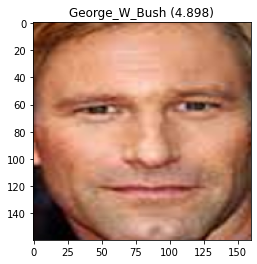

In [57]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()
